### 2장  9/22 10:30 제출
1. Smote, adasyn 에 k-neighbors 조절하여 변화에 대해 논의
2. 특성변수의 선택에서 교재에 있는 digit 데이터 이용하여 목적변수 분류일 때 chi.f_classif 그리고 mutual_info_classic 를 적용한 결과 비교

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN  
## 3퍼 7퍼 90퍼 의 분할
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=10, 
                           n_clusters_per_class=1, n_samples=2000, random_state=10)
print('Original dataset shape %s' % Counter(y))  

Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [ ]:
for i in [2, 5, 8, 11]: 
    sm = SMOTE(random_state=42, k_neighbors = 50)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled after Smote k =',i, '%s' % Counter(y_res))
# Smote는 k_neightbors 값과 상관없이 동일하게 추출

Resampled after Smote k = 2 Counter({2: 1795, 1: 1795, 0: 1795})
Resampled after Smote k = 5 Counter({2: 1795, 1: 1795, 0: 1795})
Resampled after Smote k = 8 Counter({2: 1795, 1: 1795, 0: 1795})
Resampled after Smote k = 11 Counter({2: 1795, 1: 1795, 0: 1795})


In [ ]:
for i in [2, 5, 8, 11]: 
    ada=ADASYN(random_state=42, n_neighbors = i)
    X_syn,y_syn=ada.fit_resample(X,y)
    print('Resampled dataset ADASYN k=',i, '%s' % Counter(y_syn))
# s

Resampled dataset ADASYN k= 2 Counter({1: 1801, 2: 1795, 0: 1792})
Resampled dataset ADASYN k= 5 Counter({1: 1805, 2: 1795, 0: 1795})
Resampled dataset ADASYN k= 8 Counter({1: 1801, 2: 1795, 0: 1790})
Resampled dataset ADASYN k= 11 Counter({2: 1795, 1: 1787, 0: 1786})


In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
import numpy as np
import pandas as pd
x,y=load_digits(return_X_y=True)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
import numpy as np
import pandas as pd
x,y=load_digits(return_X_y=True)
df = pd.DataFrame(x)

In [ ]:
sb_chi = SelectKBest(score_func = chi2, k = 10)
x_new_chi = sb_chi.fit_transform(x,y)
x_new_chi.shape
sb_chi_sup = sb_chi.get_support()*range(x.shape[1])
sb_chi_sup[sb_chi_sup>0]

array([20, 21, 26, 30, 33, 34, 42, 43, 54, 62])

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif
sb_f = SelectKBest(score_func =  f_classif, k = 10)
x_new_f = sb_f.fit_transform(x,y)
x_new_f.shape
sb_f_sup = sb_f.get_support()*range(x.shape[1])
sb_f_sup[sb_f_sup>0]

c:\users\noah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
c:\users\noah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([10, 20, 21, 26, 28, 33, 34, 36, 42, 43])

In [ ]:
from sklearn.feature_selection import mutual_info_classif
sb_minf = SelectKBest(score_func =  mutual_info_classif, k = 10)
x_new_minf = sb_minf.fit_transform(x,y)
x_new_minf.shape
sb_minf_sup = sb_minf.get_support()*range(x.shape[1])
sb_minf_sup[sb_minf_sup>0]

array([21, 26, 28, 30, 33, 34, 36, 42, 43, 61])

In [ ]:
print('Features selected by chi2 : ',sb_chi_sup[sb_chi_sup>0])
print('Features selected by f :    ',sb_f_sup[sb_f_sup>0])
print('Features selected by m.inf :',sb_minf_sup[sb_minf_sup>0])

# 1~2: 21, 22, 27, 34, 35, 43, 44
# 2~3: 22, 27, 29, 34, 35, 37, 43, 44
# 3~1: 22, 27, 31, 34, 35, 43, 44

# 셋다: 22, 27, 34, 35, 43, 44


# 카이제곱, F는 선형적 관계일 때만 적용, 1.그럼 뮤추얼만 해당, 2. 뮤추얼만 없는 경우 이 경우에는 큰 상관 X
#1번: 62
# 2번: 21
#but 여기서는 크게 적용되지 않을듯함. 저기 나와있는 

Features selected by chi2 :  [21 22 27 31 34 35 43 44 55 63]
Features selected by f :     [11 21 22 27 29 34 35 37 43 44]
Features selected by m.inf : [22 27 29 31 34 35 39 43 44 62]


In [ ]:
feat_chi = [20, 21, 26, 30, 33, 34, 42, 43, 54, 62]
feat_f = [10, 20, 21, 26, 28, 33, 34, 36, 42, 43]
feat_minf = [21, 26, 28, 30, 33, 34, 36, 42, 43, 61]

In [ ]:
import matplotlib.pyplot as plt
feat_chi = [21, 22, 27, 31, 34, 35, 43, 44, 55, 63]
feat_f = [11, 21, 22, 27, 29, 34, 35, 37, 43, 44]
feat_minf = [22, 27, 29, 31, 34, 35, 37, 43, 44, 62]


feat_T = [feat_chi, feat_f, feat_minf]

fig, ax = plt.subplots(1,3)
for i in range(3):
    x_feat = np.zeros(64)
    x_feat[feat_T[i]] = 1
    x_feat = x_feat.reshape((-1, 8))
    ax[i+1]=plt.gray() 
    ax[i+1]=plt.matshow(x_feat) 
plt.show()


<Figure size 432x288 with 0 Axes>

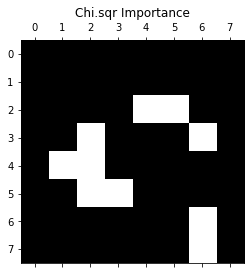

In [ ]:
x_feat = np.zeros(64)
x_feat[feat_chi] = 1
x_feat = x_feat.reshape((-1, 8))
plt.gray() 
plt.matshow(x_feat) 
plt.title('Chi.sqr Importance')
plt.show()

<Figure size 432x288 with 0 Axes>

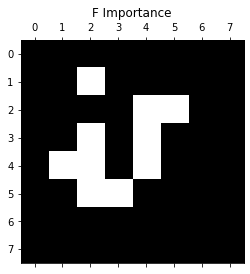

In [ ]:
x_feat = np.zeros(64)
x_feat[feat_f] = 1
x_feat = x_feat.reshape((-1, 8))
plt.gray() 
plt.matshow(x_feat) 
plt.title('F Importance')
plt.show()


<Figure size 432x288 with 0 Axes>

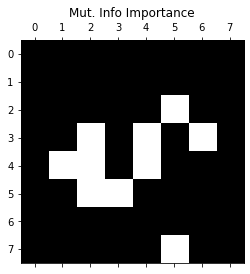

In [ ]:

x_feat = np.zeros(64)
x_feat[feat_minf] = 1
x_feat = x_feat.reshape((-1, 8))
plt.gray() 
plt.matshow(x_feat) 
plt.title('Mut. Info Importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

In [ ]:
digits.images[2]

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [ ]:
np.max(digits.images[2].tolist())

16.0

In [ ]:
x_feat = np.zeros(64)
x_feat[feat_chi] = 1
x_feat = x_feat.reshape((-1, 8))
x_feat

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

<Figure size 432x288 with 0 Axes>

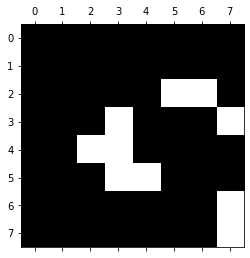

In [ ]:

plt.gray() 
plt.matshow(x_feat) 
plt.show() 